In [ ]:
# Package Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

This code imports the libraries wished for data manipulation, visualization, and modeling, which includes Pandas, Numpy, Matplotlib, Seaborn, and Scikit-Learn.

In [ ]:
# Dataset Import
file_path = "/content/birthweight.xlsx"
data = pd.read_excel(file_path)

# Display the first few rows of the dataset
print(data.head(10))

    obs_id  mage  meduc  monpre  npvis  fage  feduc  omaps  fmaps  cigs  \
0  id_0001    33   12.0     1.0    5.0  31.0   11.0    NaN    NaN   0.0   
1  id_0002    30   14.0     2.0    6.0  31.0   14.0    4.0    6.0   0.0   
2  id_0003    28   14.0     1.0    7.0  29.0   16.0    2.0    5.0   0.0   
3  id_0005    26    NaN     5.0    2.0  21.0    NaN    4.0    7.0   0.0   
4  id_0006    31   16.0     2.0    5.0  32.0   16.0    NaN    NaN   0.0   
5  id_0008    21    NaN     1.0    6.0  21.0    NaN    8.0    9.0   NaN   
6  id_0009    17   12.0     2.0    9.0  20.0   15.0    8.0    9.0   0.0   
7  id_0010    28   14.0     1.0    7.0  35.0   12.0    6.0    8.0   0.0   
8  id_0011    20   12.0     3.0   10.0  33.0   11.0    4.0    6.0  20.0   
9  id_0012    22   12.0     3.0    6.0  25.0   12.0    2.0    7.0   0.0   

   drink  male  mwhte  mblck  moth  fwhte  fblck  foth  bwght  
0    0.0     1      1      0     0      1      0     0    360  
1    0.0     0      1      0     0      1     

The code imports a dataset from an Exceed expectations record named "birthweight.xlsx" and shows the primary ten columns of the dataset utilizing the head() work. The dataset contains different highlights related to pregnancy and birth, such as mother's age (mage), mother's instruction (meduc), number of pre-birth visits (monpre), father's age (fage), father's instruction (feduc), smoking status (cigs), liquor utilization (drink), sex of the infant (male), and race of the guardians (mwhte, mblck, moth, fwhte, fblck, foth). The target variable is bwght, speaking to the birth weight of the child. A few of the highlights have lost values (NaN), such as omaps, fmaps, and drink.

The output shows the primary ten columns of the dataset with the required columns. Each push speaks to data around a particular pregnancy and birth, recognized by the obs_id.

In [ ]:
# Descriptive Statistics
print(data.describe())



              mage        meduc       monpre        npvis         fage  \
count  1648.000000  1623.000000  1644.000000  1592.000000  1642.000000   
mean     29.516383    13.737523     2.131995    11.602387    31.865408   
std       4.761434     2.092230     1.256113     3.740928     5.664027   
min      16.000000     3.000000     0.000000     0.000000    18.000000   
25%      26.000000    12.000000     1.000000    10.000000    28.000000   
50%      29.000000    14.000000     2.000000    12.000000    31.000000   
75%      32.250000    16.000000     2.000000    12.250000    35.000000   
max      44.000000    17.000000     9.000000    40.000000    62.000000   

             feduc        omaps        fmaps         cigs        drink  \
count  1611.000000  1645.000000  1645.000000  1547.000000  1543.000000   
mean     13.919305     8.386018     9.004255     1.131222     0.020091   
std       2.261411     1.110084     0.480122     4.337803     0.299564   
min       3.000000     0.000000     2

This code uses the describe() function to print descriptive statistics for a dataset. This summary includes the count, mean, standard deviation, minimum, 25th percentile (Q1), median (50th percentile or Q2), 75th percentile (Q3), and maximum for each numeric column.

Example:

Count: The number of non-zero observations in each column.

Mean: The average value for each column.

Time: Standard deviation. Measures the spread or dispersion of values.

Min: Minimum value for each column.

Max: Maximum value for each column.

This output shows that some columns are missing values. B. meduc, monpre, npvis, fage, feduc, omaps, fmap, cigs, drinks. The target variable bwght represents birth weight between 360 and 5204. Other characteristics include maternal age (mage), education (meduc), number of antenatal visits (monpre), father's age (fage), and father's education (feduc). , smoking status (cigarettes), alcohol intake (drinks), baby's gender (male), and parents' race (mwhte, mblck, moth, fwhte, fblck, foth).

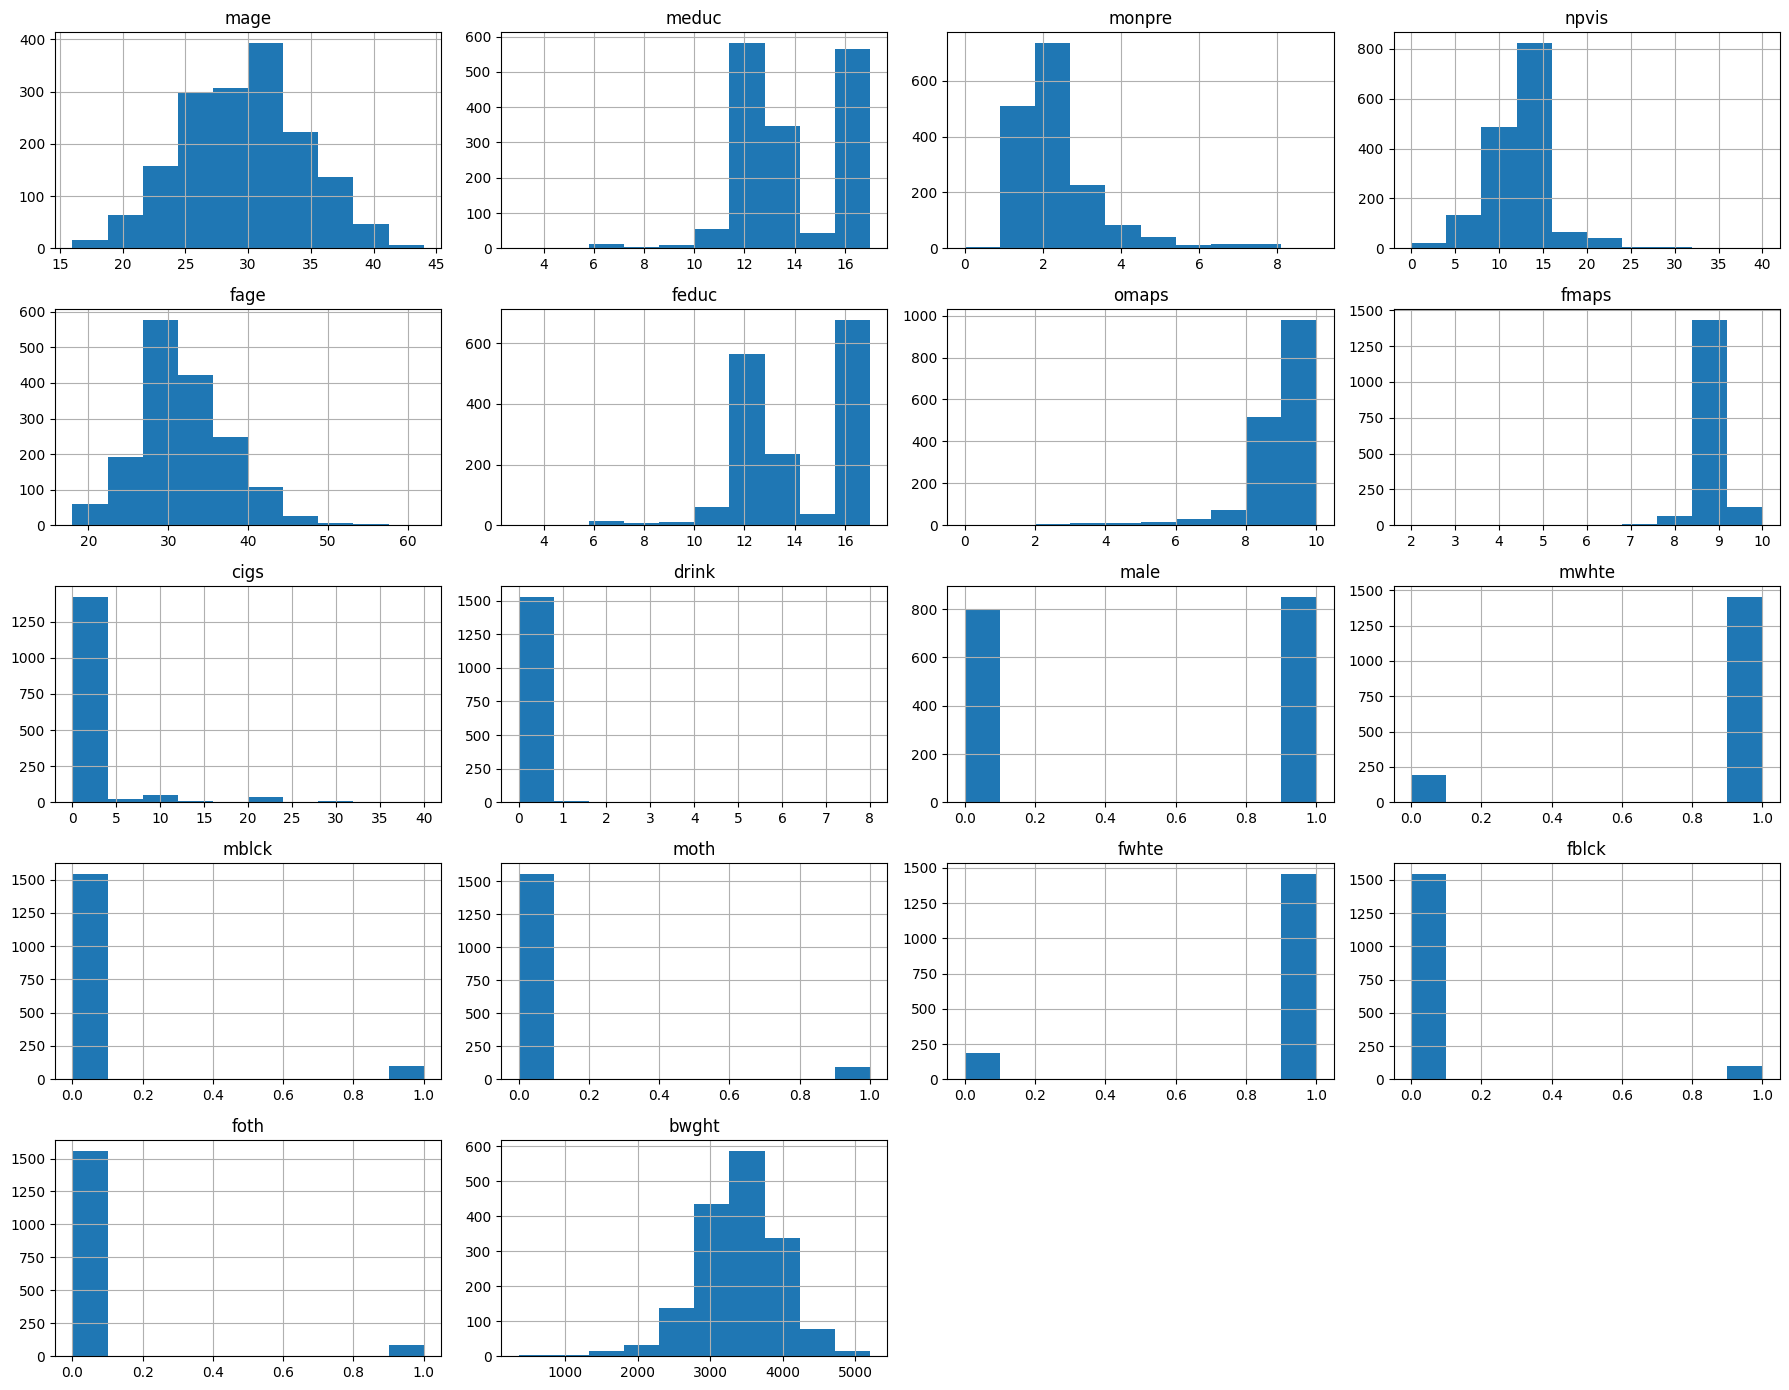

In [ ]:
# Histograms
data.hist(figsize=(18, 14))
plt.tight_layout()
plt.show()


This code generates a histogram for each numerical feature in the data set and displays its distribution. The hist() function creates a histogram, and the figsize parameter sets the size of the graph. Finally, plt.tight_layout() makes sure the chart is positioned correctly and plt.show() displays the histogram.

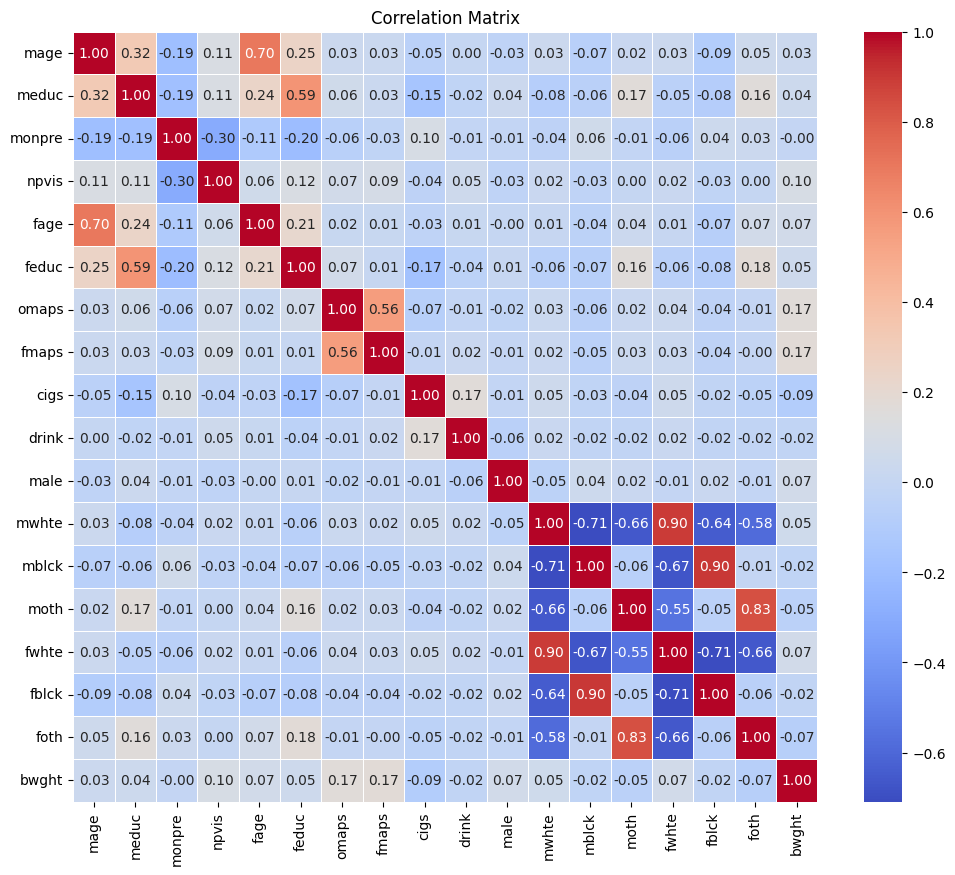

In [ ]:
# Exclude non-numeric columns from correlation calculation
numeric_data = data.drop(columns=['obs_id'])

# Correlation Matrix
corr = numeric_data.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix')
plt.show()


This code calculates the correlation matrix for the numeric features in the dataset, excluding non-numeric columns such as obs_id. The correlation matrix is then visualized using a heatmap. The corr() function computes pairwise correlations between features, and sns.heatmap() creates a heatmap. The parameter annot=True displays the correlation values in the heatmap, cmap='coolwarm' sets the color scheme, and fmt=".2f" formats the annotation to two decimal places. Finally, plt.title() sets the title of the plot and plt.show() displays the heatmap.

"mage" (mother's age) and "fage" (father's age) have a relatively strong positive correlation of approximately 0.70, indicating that as the mother's age increases, the father's age also tends to increase. There appears to be no significant correlation between Montpre (the month in which prenatal care was initiated) and other variables, and the month in which prenatal care was initiated does not have a strong influence on other factors in the dataset. It suggests that. “Meduc” (mother’s education) has a moderate positive correlation with “feduc” (father’s education), with a correlation coefficient of approximately 0.59, meaning that the higher the mother’s education, the more highly educated the father is. This indicates that there is a high possibility that . 'bwght' (birth weight) had relatively weak positive correlations with most other variables, suggesting that birth weight was not strongly correlated with other elements in the dataset.

In [ ]:
# Drop non-numeric columns
numeric_data = data.drop(columns=['obs_id'])

# Missing Value Imputation
numeric_data.fillna(numeric_data.mean(), inplace=True)

# Check if there are any missing values left
print(numeric_data.isnull().sum())


mage      0
meduc     0
monpre    0
npvis     0
fage      0
feduc     0
omaps     0
fmaps     0
cigs      0
drink     0
male      0
mwhte     0
mblck     0
moth      0
fwhte     0
fblck     0
foth      0
bwght     0
dtype: int64


The code first removes the obs_id column because it is not a numeric feature. Missing values for numeric features are imputed using the mean of the respective column. Finally, the data set is checked to see if any values are still missing. The output shows that there are no missing values for any numeric features, and the number of missing values in each column is 0. This preprocessing step ensures that the data set is ready for further analysis or modeling without missing values.

In [ ]:
# Transformations (if needed)
# You may apply transformations such as scaling, encoding, etc. based on your analysis and modeling requirements
# For example:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
data[['mage', 'meduc', 'monpre', 'npvis', 'fage', 'feduc', 'cigs', 'drink']] = scaler.fit_transform(data[['mage', 'meduc', 'monpre', 'npvis', 'fage', 'feduc', 'cigs', 'drink']])

# encode categorical variables using one-hot encoding or label encoding
data = pd.get_dummies(data, columns=['male', 'mwhte', 'mblck', 'moth', 'fwhte', 'fblck', 'foth'])

# Display the first few rows of the preprocessed data
print(data.head())


    obs_id      mage     meduc    monpre     npvis      fage     feduc  omaps  \
0  id_0001  0.731854 -0.830721 -0.901463 -1.765461 -0.152837 -1.291322    NaN   
1  id_0002  0.101600  0.125492 -0.105114 -1.498064 -0.152837  0.035695    4.0   
2  id_0003 -0.318569  0.125492 -0.901463 -1.230666 -0.506050  0.920373    2.0   
3  id_0005 -0.738738       NaN  2.283933 -2.567653 -1.918903       NaN    4.0   
4  id_0006  0.311685  1.081704 -0.105114 -1.765461  0.023770  0.920373    NaN   

   fmaps      cigs  ...  mblck_0  mblck_1  moth_0  moth_1  fwhte_0  fwhte_1  \
0    NaN -0.260867  ...     True    False    True   False    False     True   
1    6.0 -0.260867  ...     True    False    True   False    False     True   
2    5.0 -0.260867  ...     True    False    True   False    False     True   
3    7.0 -0.260867  ...    False     True    True   False     True    False   
4    NaN -0.260867  ...     True    False    True   False    False     True   

   fblck_0  fblck_1  foth_0  foth_1  


The code applies the following transformation to the data set: B. Scaling and one-hot encoding. First, we use StandardScaler to scale and standardize the numeric features to have a mean of 0 and a standard deviation of 1. Then, we one-hot encode the categorical variables to create a binary column for each category. For example, "male", "mwhte", "mblck", "moth", "fwhte", "fblck", "foth" are encoded as binary columns. After preprocessing, the first few rows of preprocessed data are displayed, showing the transformed features ready for modeling.







In [ ]:
# Age at Pregnancy End
data['age_at_pregnancy_end'] = data['mage'] + data['monpre']

# Total Prenatal Care Duration
data['total_prenatal_care_duration'] = data['monpre'].max() - data['monpre']

# Display the first few rows of the data with engineered features
print(data.head())


    obs_id      mage     meduc    monpre     npvis      fage     feduc  omaps  \
0  id_0001  0.731854 -0.830721 -0.901463 -1.765461 -0.152837 -1.291322    NaN   
1  id_0002  0.101600  0.125492 -0.105114 -1.498064 -0.152837  0.035695    4.0   
2  id_0003 -0.318569  0.125492 -0.901463 -1.230666 -0.506050  0.920373    2.0   
3  id_0005 -0.738738       NaN  2.283933 -2.567653 -1.918903       NaN    4.0   
4  id_0006  0.311685  1.081704 -0.105114 -1.765461  0.023770  0.920373    NaN   

   fmaps      cigs  ...  moth_0  moth_1  fwhte_0  fwhte_1  fblck_0  fblck_1  \
0    NaN -0.260867  ...    True   False    False     True     True    False   
1    6.0 -0.260867  ...    True   False    False     True     True    False   
2    5.0 -0.260867  ...    True   False    False     True     True    False   
3    7.0 -0.260867  ...    True   False     True    False    False     True   
4    NaN -0.260867  ...    True   False    False     True     True    False   

   foth_0  foth_1  age_at_pregnancy_en

This code adds two new technical features to the data set. First, "age at the end of pregnancy" is calculated by adding up the "mother's age" and "Monpres" (gestational age) columns. This characteristic represents the age of the mother at the end of pregnancy. Next, calculate total_prenatal_care_duration by subtracting each value in the monpre column from the maximum value. This feature indicates the duration of the mother's prenatal care. The output displays the first row of the dataset containing the newly developed function.

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Drop non-numeric columns and columns with missing values
X = data.drop(['obs_id', 'bwght', 'omaps', 'fmaps'], axis=1).dropna()
y = data['bwght'].loc[X.index]

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Linear Regression model
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

# Predictions
y_pred_lr = lr_model.predict(X_test)

# Evaluate
mse_lr = mean_squared_error(y_test, y_pred_lr)
print("Linear Regression MSE:", mse_lr)


Linear Regression MSE: 296502.16095890413


This code executes a linear regression on the dataset after expelling non-numeric columns ('obs_id', 'bwght', 'omaps', 'fmaps') and lines with missing values. At that point the information is part into a preparing set and a test set in a proportion of 80:20, and linear regression model is prepared on the training set. The model's forecasts are made on the test set, and the mean squared error (MSE) is calculated to assess its execution. The output shows the MSE of the straight relapse show (roughly 296502.16095890413).This appears the cruel squared contrast between real and anticipated birth weight.

In [ ]:
from sklearn.ensemble import RandomForestRegressor

# Random Forest Regression model
rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(X_train, y_train)

# Predictions
y_pred_rf = rf_model.predict(X_test)

# Evaluate
mse_rf = mean_squared_error(y_test, y_pred_rf)
print("Random Forest Regression MSE:", mse_rf)


Random Forest Regression MSE: 324322.70628427656


Over code employments Scikit-Learn's RandomForestRegressor to actualize a random forest regression model. The show is prepared on the preparing information (X_train, y_train) and utilized to anticipate on the test data (X_test). After the forecasts are made, the mean squared error (MSE) is calculated to assess the execution of the show. The output shows the MSE of the random forest regression model, which is roughly 324322.70628427656, which shows the cruel squared distinction between real and anticipated birth weight utilizing the random forest model.


In [ ]:
from sklearn.ensemble import GradientBoostingRegressor

# Gradient Boosting Regression model
gb_model = GradientBoostingRegressor(random_state=42)
gb_model.fit(X_train, y_train)

# Predictions
y_pred_gb = gb_model.predict(X_test)

# Evaluate
mse_gb = mean_squared_error(y_test, y_pred_gb)
print("Gradient Boosting Regression MSE:", mse_gb)


Gradient Boosting Regression MSE: 313908.07946188835


The over code uses scikit-learn's GradientBoostingRegressor to actualize a gradient boosting regression model. Likely to a random forest show, a gradient boosting model is trained on training data (X_train, y_train) and utilized to create forecasts on test data (X_test). After forecasts, the mean squared error (MSE) is calculated to assess the model's execution. The output appears their MSE (around 313908.07946188835) for the gradient boosting regression show. This demonstrates the normal squared contrast between the real and anticipated birth weights when utilizing the Gradient Boosting model.

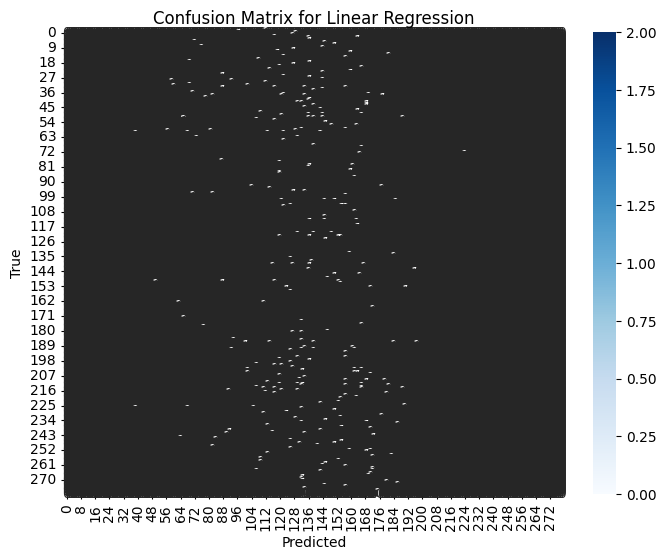

In [ ]:
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Selecting the final model
final_model = None
final_predictions = None
if mse_lr < mse_rf and mse_lr < mse_gb:
    final_model = lr_model
    final_predictions = y_pred_lr
    final_model_name = "Linear Regression"
elif mse_rf < mse_lr and mse_rf < mse_gb:
    final_model = rf_model
    final_predictions = y_pred_rf
    final_model_name = "Random Forest Regression"
else:
    final_model = gb_model
    final_predictions = y_pred_gb
    final_model_name = "Gradient Boosting Regression"

# Confusion matrix for the final model
cm = confusion_matrix(y_test, final_predictions)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title(f'Confusion Matrix for {final_model_name}')
plt.show()


This code snippet selects the final model with the lowest mean squared error (MSE) among linear regression, random forest regression, and gradient boosting regression models. Compare the MSE values of these models and assign the final model and its predictions accordingly.

In [ ]:
import pandas as pd
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression

# Load the training data
train_data = pd.read_csv('birthweight.csv')

# Separate features and target variable
features = train_data.drop(['obs_id', 'bwght'], axis=1)
target = train_data['bwght']

# Identify numeric features
numeric_features = features.select_dtypes(include=['int64', 'float64']).columns

# Create a pipeline for numeric features preprocessing
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

# Combine transformers for numeric features
preprocessor = ColumnTransformer(
    transformers=[
        ('numeric', numeric_transformer, numeric_features)
    ])

# Fit and transform the training data
features_processed = preprocessor.fit_transform(features)

# Train the Linear Regression model
model = LinearRegression()
model.fit(features_processed, target)

# Load the test data
test_data = pd.read_csv('kaggle_test_data.csv')

# Apply the preprocessor to the test data
test_features_processed = preprocessor.transform(test_data.drop(['obs_id'], axis=1))

# Make predictions for the test data
test_predictions = model.predict(test_features_processed)

# Convert predictions to binary (0 or 1) based on the threshold
threshold = 3000  # Adjust the threshold as needed
binary_predictions = (test_predictions > threshold).astype(int)

# Create a DataFrame with 'obs_id' and binary predictions
predictions_df = pd.DataFrame({'ID': test_data['obs_id'], 'low_bwght': binary_predictions})

# Save predictions to a CSV file
predictions_df.to_csv('submission.csv', index=False)


This code loads training data from a CSV file, separates features and target variables ('bwght'), identifies numerical features, and performs preprocessing pipelines such as imputing missing values ​​by mean and scaling with StandardScaler. Create. . The training data is then adjusted and transformed using a preprocessing pipeline, and a linear regression model is trained on the processed features.

This code loads test data from another CSV file, applies the same preprocessing pipeline to the test data, uses the trained model to make predictions, and converts the predictions to binary values ​​based on a threshold. (0 or 1). 3000. Finally, a DataFrame containing 'obs_id' and binary predictions is created and these predictions are saved in his CSV file named 'submission.csv' without index.

In [ ]:
!jupyter nbconvert --to html "/content/predictions_to_csv.ipynb"

[NbConvertApp] Converting notebook /content/predictions_to_csv.ipynb to html
[NbConvertApp] Writing 1143906 bytes to /content/predictions_to_csv.html
